In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.generators.random_graphs as ggen
from networkx.convert_matrix import to_numpy_matrix as g2a
from networkx.convert_matrix import from_numpy_matrix as a2g
from nxpd import draw

import dit

import itertools
import numpy as np
from numpy import array as npa



In [2]:
def genGraph_equalW(n, linkRate):
    a = np.random.rand(n, n) + (np.eye(n) > linkRate)
    a = a.astype(int)
    return a

def genGraph_random_graph(n):
    g = ggen.gnm_random_graph(n, n*2, directed=True)
    a = g2a(g)
    return a


def actFun_mod(act, a):
    act = np.logical_not(act)
    act = act.astype(int)
    act = np.dot(act, a)
    act = np.mod(act, 2)
    return act

def actFun_weightSum(act, a):
    act = act.astype(int)
    act = np.dot(act, a)
    act = act >= 0
    act = np.logical_not(act)
    act = act.astype(int)
    return act


def NetEvo(act, a, f_act, nIter):
    act_history = []
    for i in range(0, nIter):
        act = f_act(act, a)
        act_history.append(act)
    return act_history

def genAllComb(n):
    return list(itertools.product('01', repeat=n))

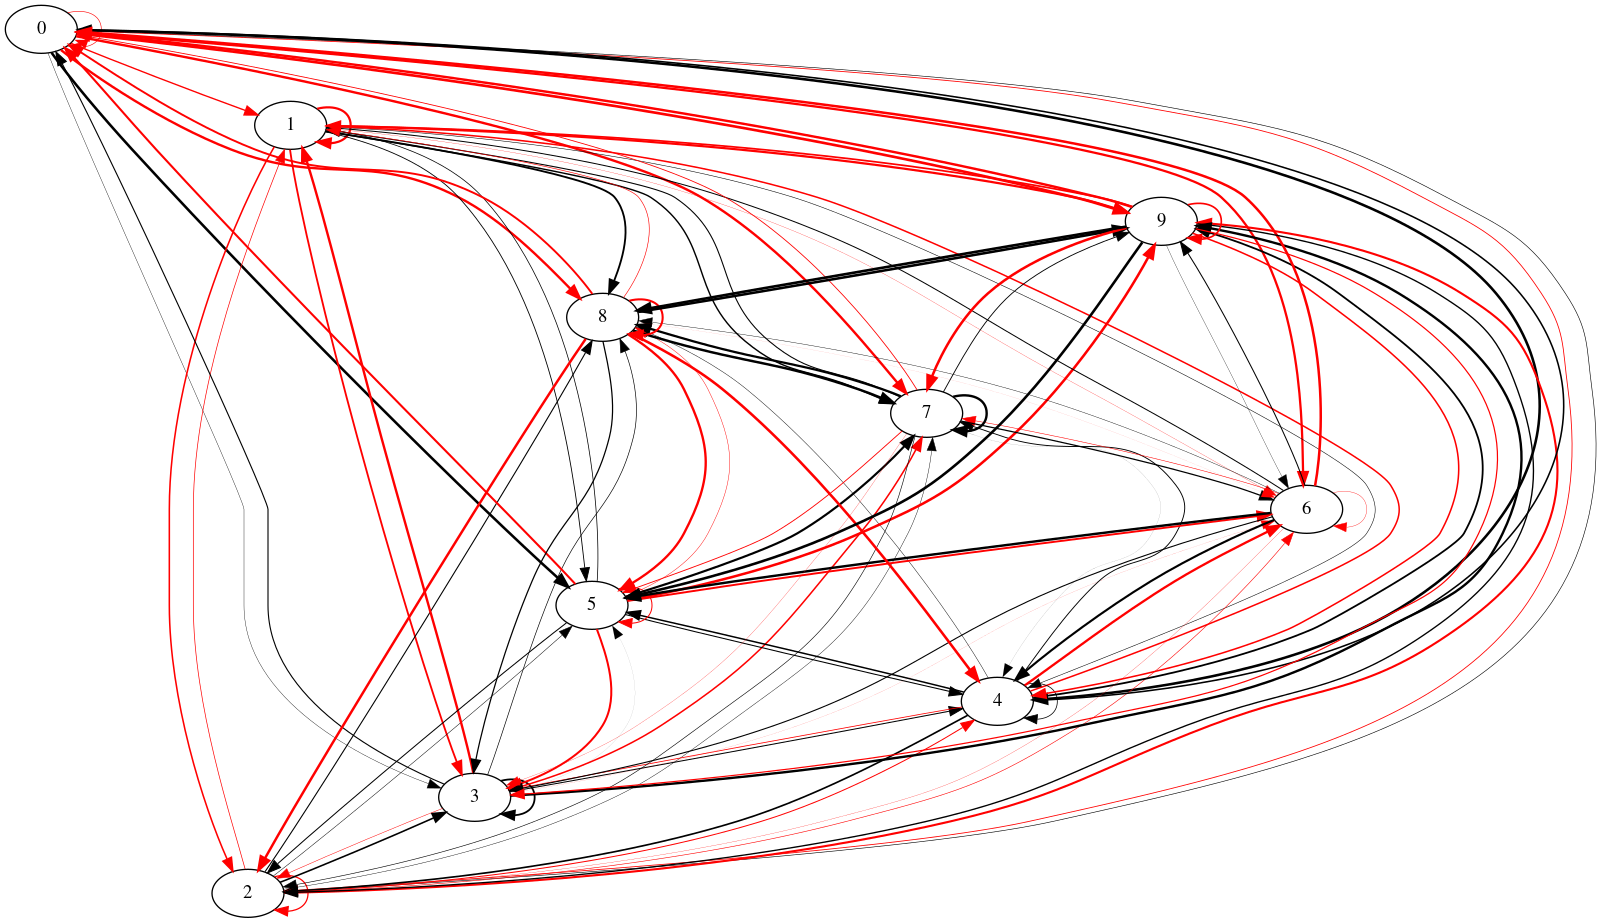

In [9]:
n = 10
a = np.random.uniform(-1, 1, (n, n))

g = a2g(a, create_using=nx.DiGraph())
edges = g.edges
for edge1, edge2 in edges:
    w = g.edges[edge1, edge2]['weight']
    g.add_edge(edge1, edge2, penwidth=w*2)
    if w < 0:
        g.add_edge(edge1, edge2, color='red', penwidth=abs(w)*2)
draw(g, show='ipynb')


In [10]:
a = np.random.uniform(-0.3, 0.3, (n, n))
nIter = 10000
f_act = actFun_weightSum

# init
act = np.random.rand(n) < 0.5
act = act.astype(int)

# run network
act_history = NetEvo(act, a, f_act, nIter)

# combine t+1
act_adj = np.hstack([act_history[0:-1], act_history[1:]])

# compute unique states and joint prob
comb, freq = np.unique(act_adj, return_counts=True, axis=0)
comb_s = [''.join(x) for x in comb.astype(str)]
prob = freq/np.sum(freq)


# tern into dist
d = dit.Distribution(comb_s, prob)
d.set_rv_names(range(n*2))
d.alphabet = (('0', '1'),)*n*2
print(d)

Class:          Distribution
Alphabet:       ('0', '1') for all rvs
Base:           linear
Outcome Class:  str
Outcome Length: 20
RV Names:       (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)

x                      p(x)
00011001010001101001   0.24992499249924993
00011010011000101101   0.25002500250025
10001011011001100001   0.25002500250025
10011000010001100101   0.25002500250025


In [339]:
comb_s = genAllComb(n)